In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

df = pd.read_csv('../offline_data/temperature_dataset.csv')
df.head(5)

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


[4.933045977011492, 6.310344827586207]


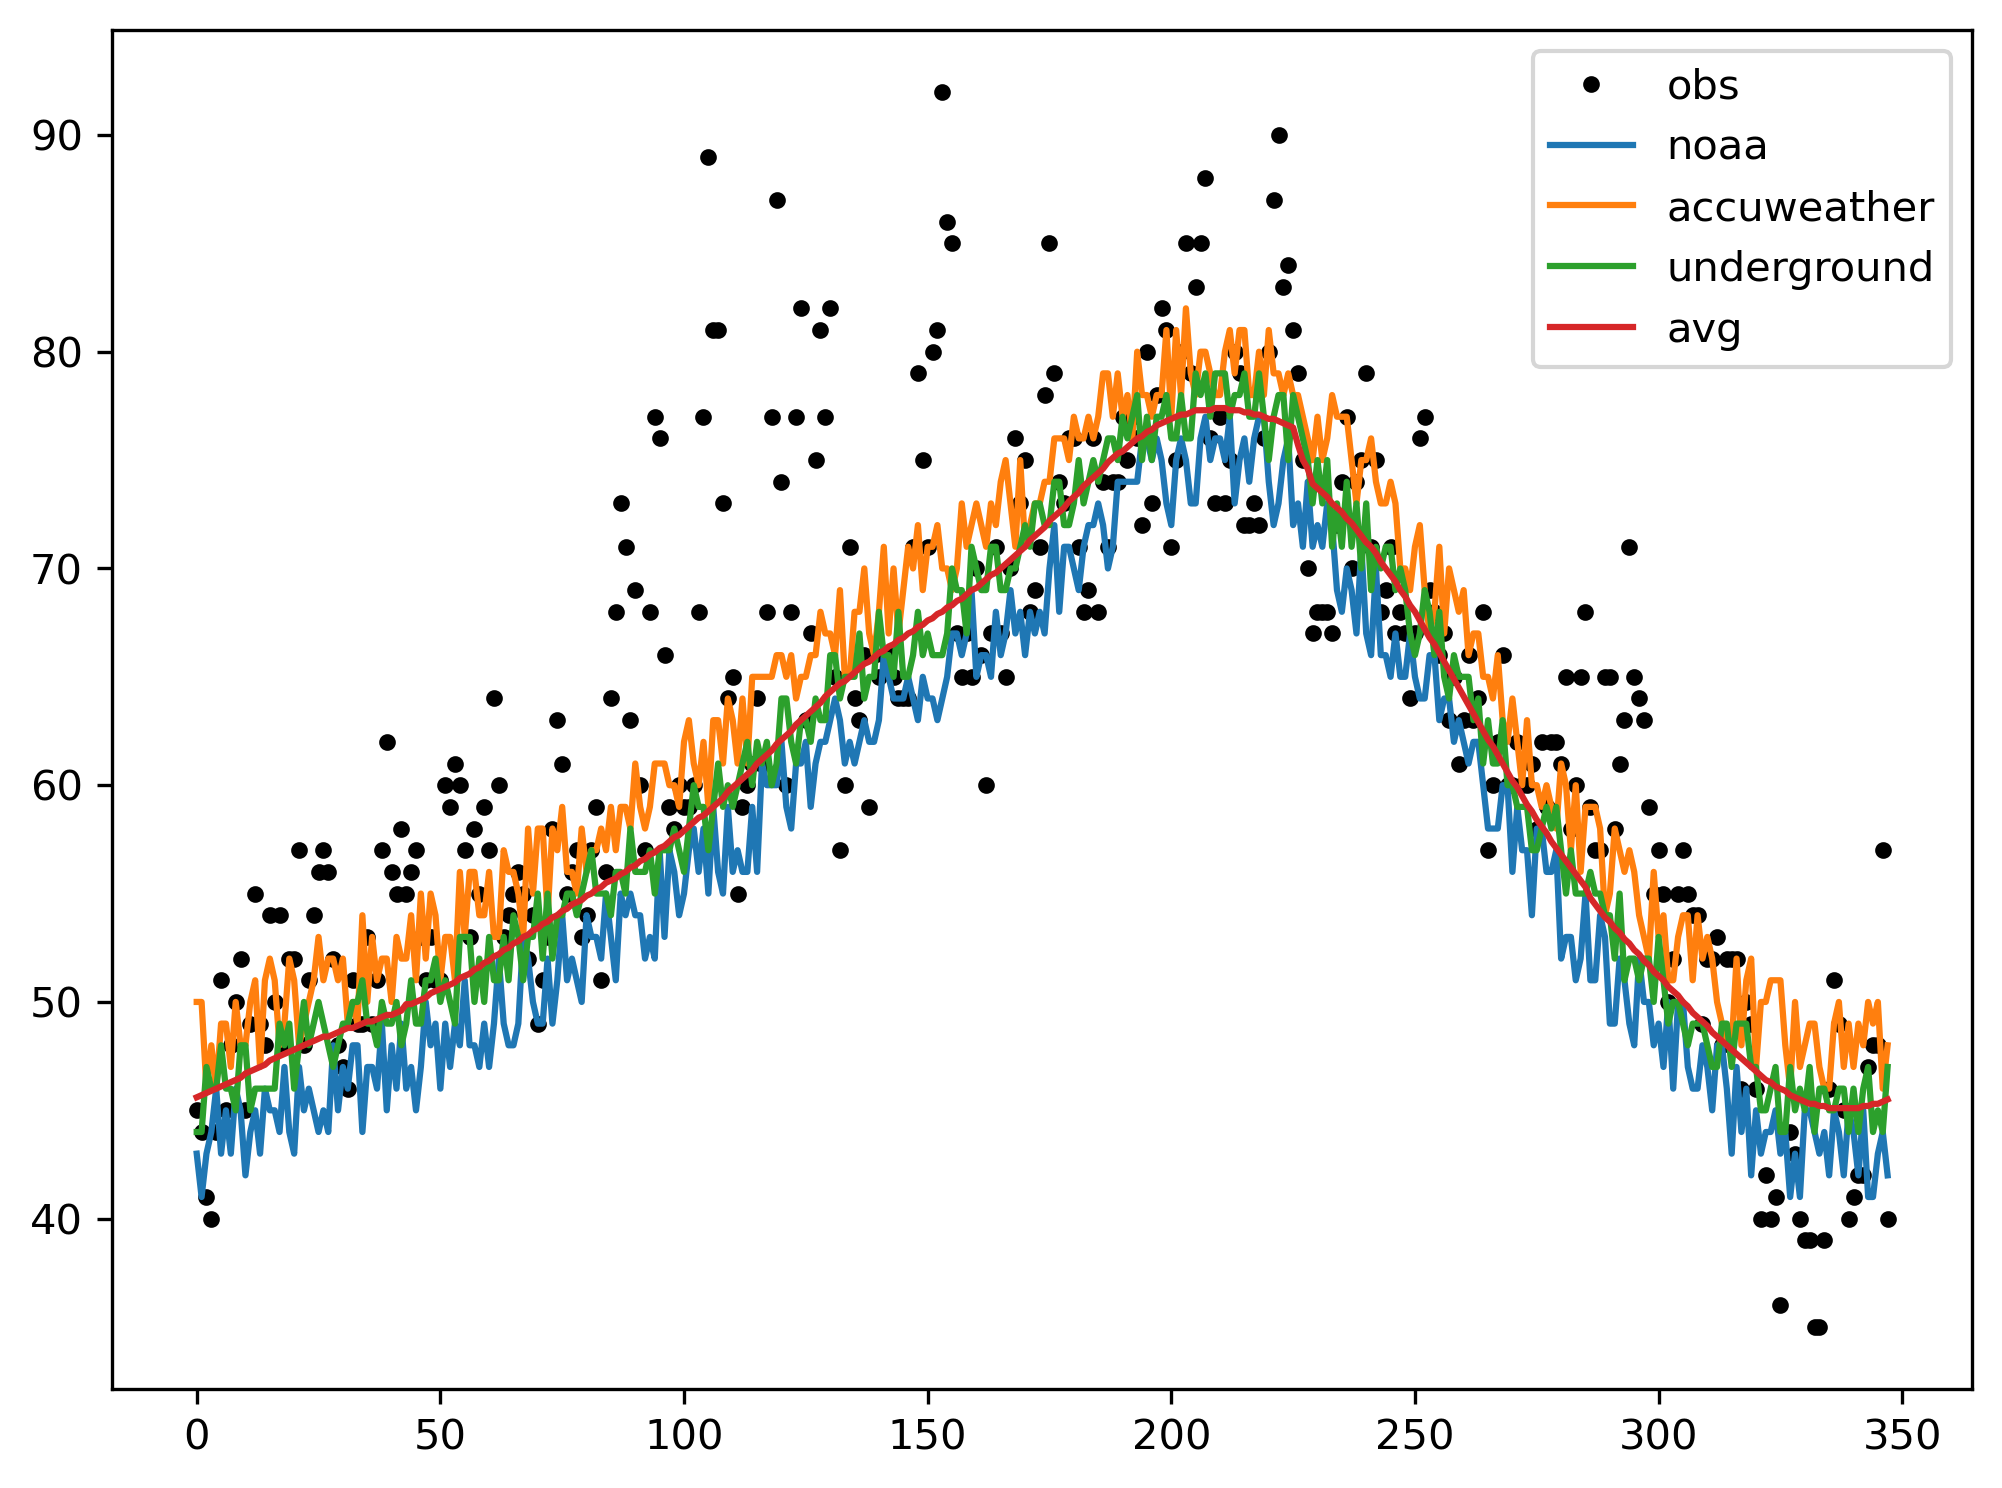

In [2]:
plt.figure(figsize=(8, 6), dpi=300)
plt.plot(df['actual'],'.k',label='obs')
plt.plot(df['forecast_noaa'],label='noaa')
plt.plot(df['forecast_acc'],label='accuweather')
plt.plot(df['forecast_under'],label='underground')
plt.plot(df['average'],label='avg')
plt.legend()

mae = np.mean(np.abs(df['average']-df['actual']))
mae_noaa = np.mean(np.abs(df['forecast_noaa']-df['actual']))
print([mae,mae_noaa])

In [3]:
x = df[['temp_1','temp_2','average']].values
y = df['actual'].values.reshape(-1,1)
x_tr, x_te, y_tr, y_te = train_test_split(x, y, test_size = 0.25, random_state = 42)
print([x.shape,y.shape])

[(348, 3), (348, 1)]


In [4]:
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x,y)
y_p = np.squeeze(LR.predict(x))
y = np.squeeze(y)

r2 = r2_score(y.T,y_p)
r2_avg = r2_score(y.T,df['average'])
mae = np.mean(np.abs(y.T-y_p))
mae_avg = np.mean(np.abs(y.T-df['average'].values))
print([r2_avg,r2])
print([mae_avg,mae])
print(LR.coef_)

[0.6619497282523764, 0.8215443169003569]
[4.933045977011494, 3.6817393333233506]
[[0.52591343 0.02697117 0.42874121]]


In [5]:
(y.T-df['average'].values).shape

(348,)

Text(0, 0.5, '$\\Delta$ T [$^o$F]')

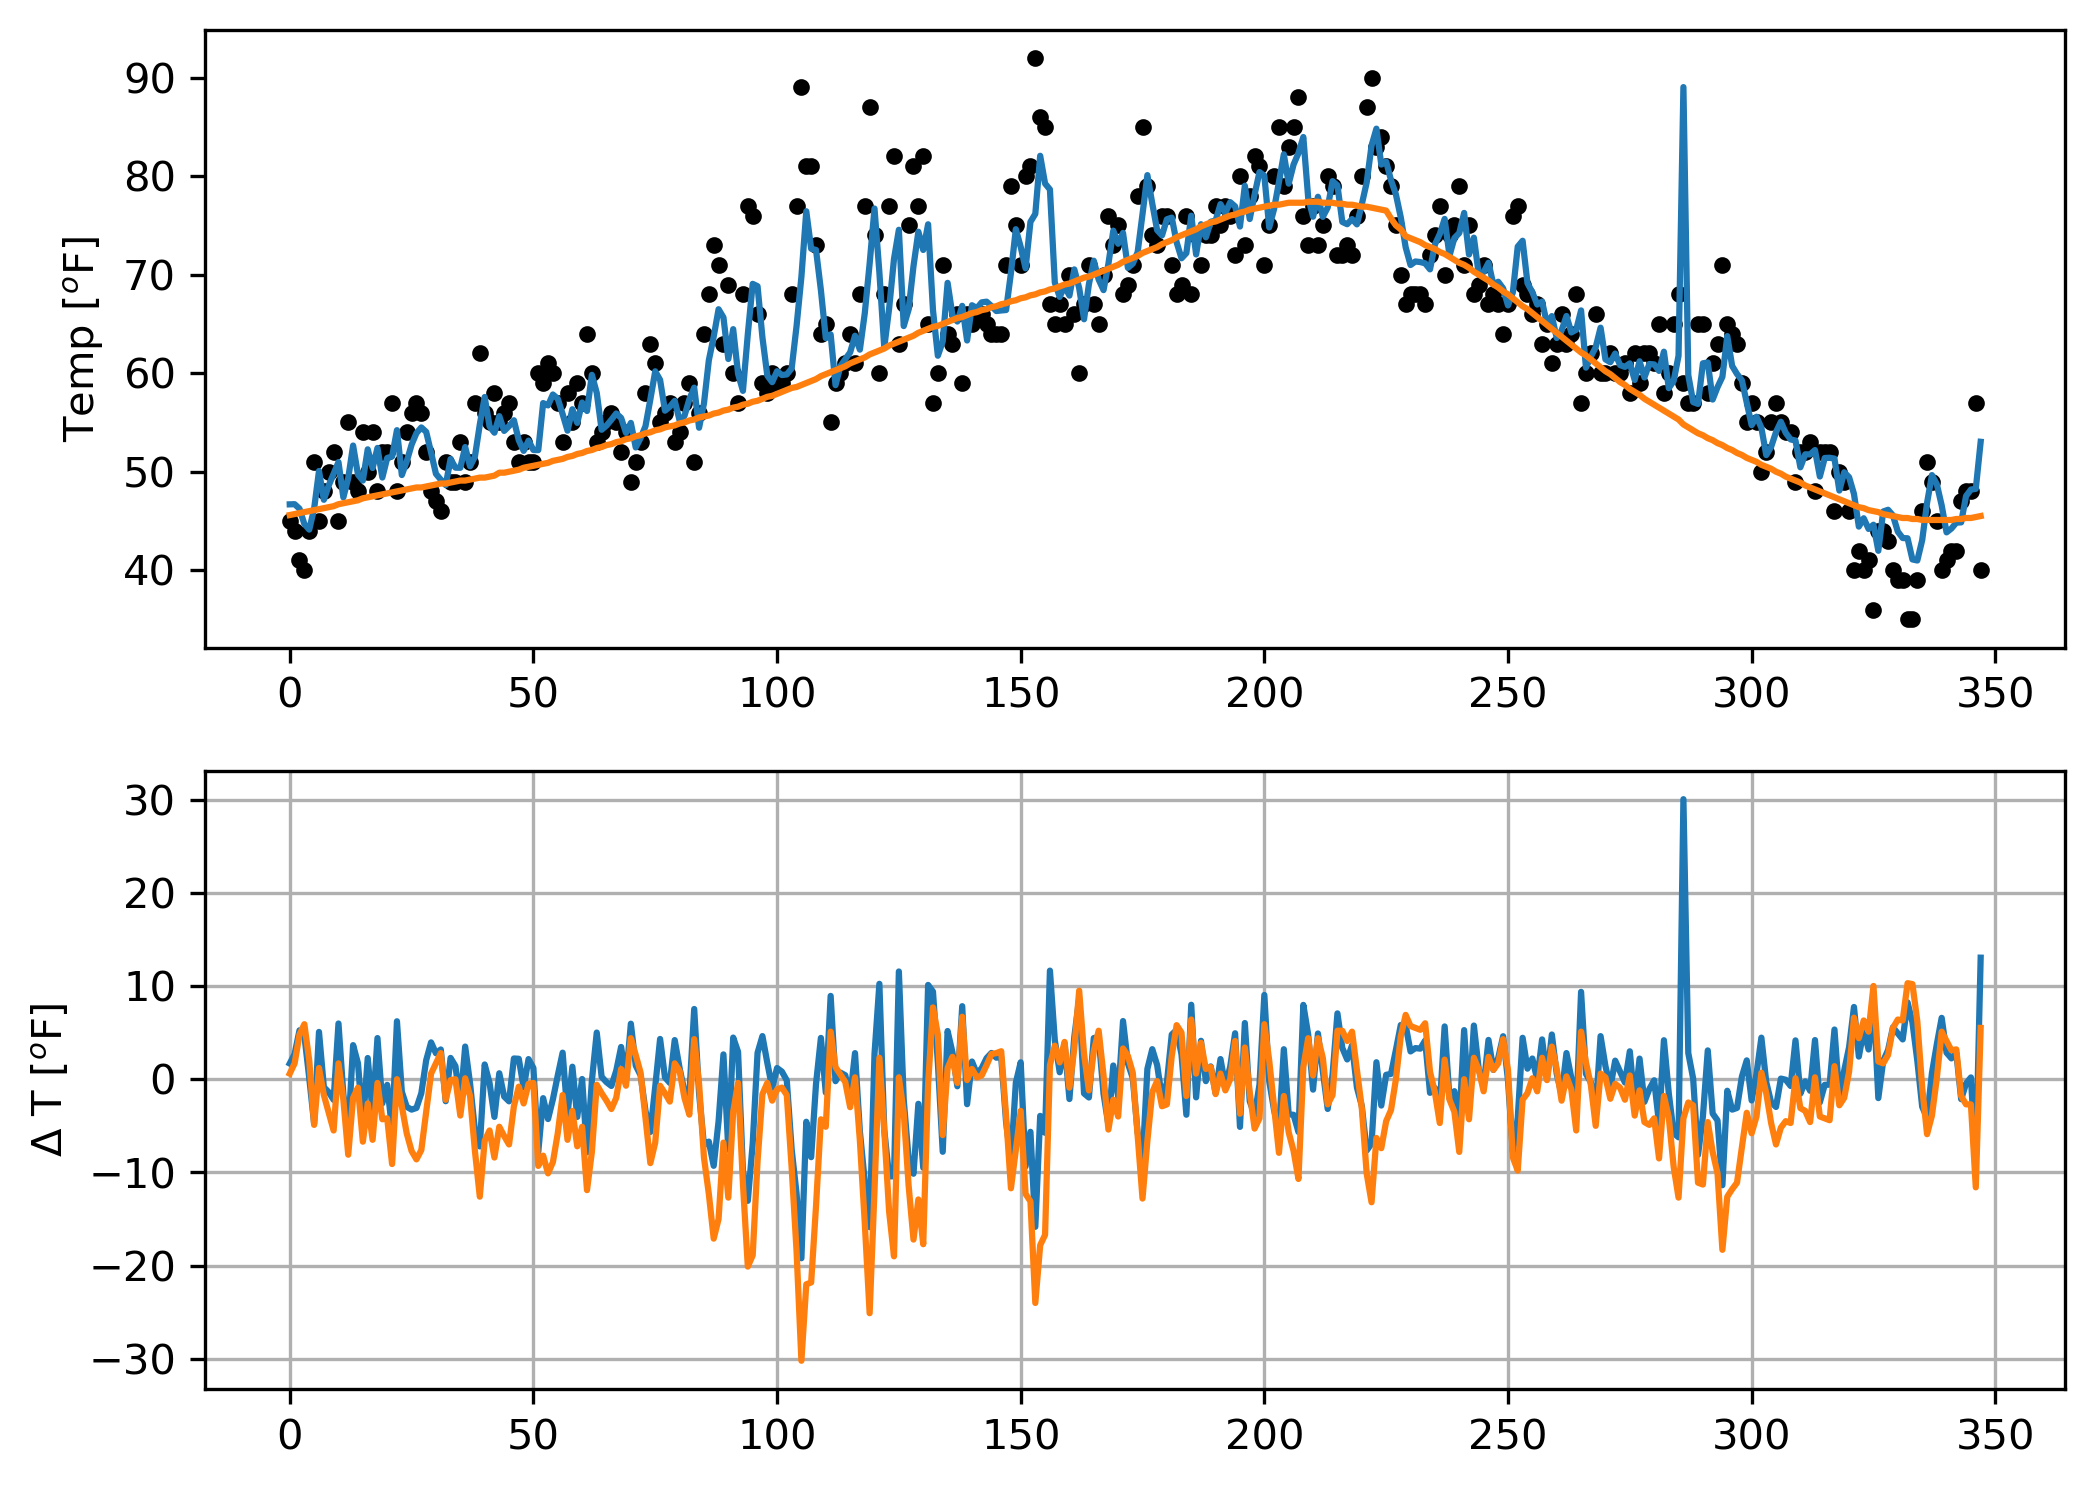

In [6]:
plt.figure(figsize=(8, 6), dpi=300)
plt.subplot(211)
plt.plot(df['actual'],'.k',label='obs')
plt.plot(y_p.T)
plt.plot(df['average'])
plt.ylabel('Temp [$^o$F]')

plt.subplot(212)
plt.plot(y_p.T-df['actual'])
plt.plot(df['average']-df['actual'])
plt.grid(1)
plt.ylabel('$\Delta$ T [$^o$F]')

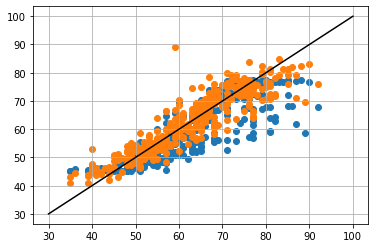

In [7]:
plt.scatter(df['actual'],df['average'])
plt.scatter(df['actual'],y_p.T)
plt.plot([30,100],[30,100],'-k')
plt.grid()

Now do with just train data

In [8]:
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_tr,y_tr)
y_p = np.squeeze(LR.predict(x_te))
y_te = np.squeeze(y_te)

r2 = r2_score(y_te.T,y_p)
r2_avg = r2_score(y_te.T,x_te[:,2])
mae = np.mean(np.abs(y_te.T-y_p))
mae_avg = np.mean(np.abs(y_te.T-x_te[:,2]))
print([r2_avg,r2])
print([mae_avg,mae])
print(LR.coef_)

[0.6081589797570233, 0.832111002863289]
[5.05977011494253, 3.4267897081428704]
[[0.45333357 0.06230118 0.45637677]]


Can random forests do better?

In [10]:
x = np.array(df[['temp_1','temp_2','average']])
y = np.array(df['actual'])

In [19]:
xtr, xte, ytr, yte = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [25]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=5000, random_state= 42)

rf.fit(xtr,ytr)


RandomForestRegressor(n_estimators=5000, random_state=42)

In [26]:
yp = rf.predict(xte)

mae = np.mean(np.abs(yp-yte))

print(mae)

3.702395402298852


In [28]:
mape = np.mean(np.abs(yp-yte)/yte)
print(mape)

0.05955096613057472
